In [1]:
import time
start_time=time.time()

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import interpolate
import pickle
import json

import strucfunc
from strucfunc import sosflog
import bfunc

In [3]:
reg = 'Car'
line = 'CarB'

In [4]:
pickle_in = open('VFL//' + reg + '.pkl',"rb")
VF = pickle.load(pickle_in)
data = VF[line]

In [5]:
data.RV.var()

64.1908215763451

In [6]:
sig = data.RV.std()
sig2 = data.RV.var()

In [7]:
box_size = np.sqrt((data.X.max()-data.X.min())*(data.Y.max()-data.Y.min()))*VF['pc']*3600

In [8]:
table = sosflog(data,0.1,3600)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
table

s                                                                 \
       count         mean        std          min          25%          50%   
ils                                                                           
0      216.0     8.789839   2.766045     0.211978     7.261944     9.404184   
1      129.0    14.358618   1.032010    12.625015    13.443648    14.541719   
2      188.0    17.916744   1.238812    15.874459    16.826052    18.058414   
3      357.0    22.588400   1.449343    20.012301    21.303552    22.389750   
4      671.0    28.565277   1.918058    25.128815    26.963010    28.622325   
5      866.0    35.799543   2.287079    31.637532    33.730470    35.809906   
6     1424.0    45.103886   3.056635    39.813962    42.396961    45.181927   
7     2233.0    56.868198   3.670492    50.130007    53.680411    56.790830   
8     3397.0    71.630906   4.568948    63.098171    67.758765    71.631621   
9     5069.0    90.151294   5.953690    79.439088    84.959066    90.339869   
10    7696.0   113.364220   7.533578   100.009860   106.946578   113.363703   
11   11862.0   142.741224   9.428972   125.907119   134.770472   143.043425   
12   17437.0   179.483733  11.863601   158.501435   169.243363   179.749110   
13   23927.0   225.913225  15.018659   199.533407   212.995976   226.135607   
14   35445.0   284.335212  18.788759   251.191013   268.135726   284.662742   
15   46353.0   357.480257  23.551505   316.230338   337.293977   357.486222   
16   56442.0   448.738699  29.576952   398.107604   423.209244   448.394120   
17   58612.0   563.585226  37.263920   501.188275   531.199234   562.266302   
18   52745.0   706.482389  46.849887   630.964145   665.539208   703.411807   
19   30403.0   877.114050  56.641181   794.335568   828.104341   868.187173   
20    8294.0  1091.856661  69.547706  1000.018542  1032.324886  1076.257431   
21    1047.0  1333.262624  62.714514  1258.934675  1283.825398  1317.194410   
22       9.0  1644.725897  41.476523  1588.467518  1602.436084  1652.707750   

                                   dV2                                   \
             75%          max    count        mean         std      min   
ils                                                                       
0      11.207008    12.587918    216.0   14.750856   60.212100   0.0000   
1      15.126312    15.845764    129.0   19.242830   70.152913   0.0000   
2      18.906149    19.928318    188.0   11.642041   45.399237   0.0009   
3      23.827790    25.091664    357.0   20.576622   69.080662   0.0000   
4      30.269168    31.621084    671.0   26.096071   72.610132   0.0000   
5      37.792754    39.802429    866.0   25.564100   67.781220   0.0001   
6      47.723883    50.113118   1424.0   31.873122   83.079159   0.0001   
7      60.012278    63.087057   2233.0   45.029549  114.700964   0.0000   
8      75.665763    79.426667   3397.0   45.213047   89.575942   0.0000   
9      95.399891    99.997282   5069.0   51.633317  103.219288   0.0000   
10    119.988853   125.881895   7696.0   66.533348  111.692710   0.0000   
11    150.932136   158.486965  11862.0   75.484607  114.713458   0.0000   
12    189.859589   199.525805  17437.0   86.885032  121.578377   0.0000   
13    238.952772   251.183547  23927.0   98.102010  129.945103   0.0000   
14    300.635662   316.227157  35445.0  107.635441  145.023158   0.0000   
15    377.972493   398.103869  46353.0  111.520524  148.684932   0.0000   
16    473.771922   501.187021  56442.0  119.079374  162.376600   0.0000   
17    595.400470   630.956505  58612.0  144.149335  183.764475   0.0000   
18    746.145160   794.310502  52745.0  188.324178  204.911741   0.0000   
19    921.293163   999.996825  30403.0  171.934998  195.676289   0.0000   
20   1142.876157  1258.914987   8294.0  174.855742  258.115286   0.0000   
21   1363.010839  1582.435391   1047.0  205.858833  275.776728   0.0016   
22   1674.020151  1693.387954      9.0  196.083856  144.546490  12.6736   

     

In [10]:
s = 0.5 * (table[('s', 'min')] + table[('s', 'max')])*VF['pc']
e_s = 0.5 * (table[('s', 'max')] - table[('s', 'min')])*VF['pc']
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')] / np.sqrt(ng)

In [11]:
r0 = np.interp(sig2, b2, s)
r0

1.128629042187406

In [12]:
r1 = np.interp(sig, b2, s,period = 360)
r1

0.5020540693810318

In [13]:
r2 = np.interp(2*sig2, b2, s, period = 360)
r2

5.089401247213739

In [14]:
#x = s
#y = b2 - sig2
#tck=interpolate.splrep(x,y,s=0)
#grid=np.linspace(x.min(),x.max(),num=len(x))
#ynew=interpolate.splev(grid,tck,der=0)
#inter=pd.DataFrame([grid,ynew]).T
#SFr=interpolate.sproot(tck)
#SFr

In [15]:
rgrid = np.linspace(s[0], s[:-1])

(64.1908215763451, 1.128629042187406, 1.0, 0.009293878266869804, 2.0)

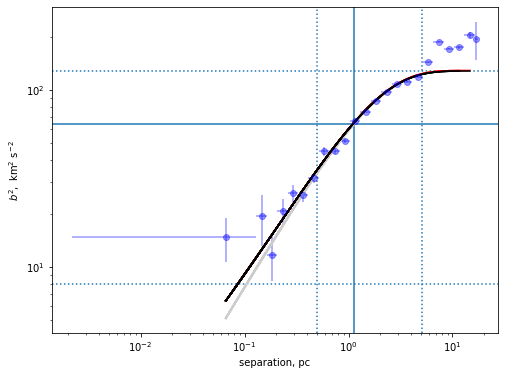

In [16]:
m = 1.0
s0 = VF['s0']
noise = 2.0


fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")


ax.axhline(sig2, ls='-')
ax.axvline(r0, ls='-')

ax.axhline(2*sig2, ls=':')
ax.axvline(r2, ls=':')

ax.axhline(sig, ls=':')
ax.axvline(r1, ls=':')

ax.plot(rgrid, bfunc.bfunc00s(rgrid, r0, sig2, m), color="0.8")
ax.plot(rgrid, bfunc.bfunc03s(rgrid, r0, sig2, m, s0, noise), color="red")
ax.plot(rgrid, bfunc.bfunc04s(rgrid, r0, sig2, m, s0, noise, box_size), color="black")

ax.set(xscale='log', yscale='log', 
       xlabel='separation, pc',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

sig2, r0, m, s0, noise

In [17]:
table

s                                                                 \
       count         mean        std          min          25%          50%   
ils                                                                           
0      216.0     8.789839   2.766045     0.211978     7.261944     9.404184   
1      129.0    14.358618   1.032010    12.625015    13.443648    14.541719   
2      188.0    17.916744   1.238812    15.874459    16.826052    18.058414   
3      357.0    22.588400   1.449343    20.012301    21.303552    22.389750   
4      671.0    28.565277   1.918058    25.128815    26.963010    28.622325   
5      866.0    35.799543   2.287079    31.637532    33.730470    35.809906   
6     1424.0    45.103886   3.056635    39.813962    42.396961    45.181927   
7     2233.0    56.868198   3.670492    50.130007    53.680411    56.790830   
8     3397.0    71.630906   4.568948    63.098171    67.758765    71.631621   
9     5069.0    90.151294   5.953690    79.439088    84.959066    90.339869   
10    7696.0   113.364220   7.533578   100.009860   106.946578   113.363703   
11   11862.0   142.741224   9.428972   125.907119   134.770472   143.043425   
12   17437.0   179.483733  11.863601   158.501435   169.243363   179.749110   
13   23927.0   225.913225  15.018659   199.533407   212.995976   226.135607   
14   35445.0   284.335212  18.788759   251.191013   268.135726   284.662742   
15   46353.0   357.480257  23.551505   316.230338   337.293977   357.486222   
16   56442.0   448.738699  29.576952   398.107604   423.209244   448.394120   
17   58612.0   563.585226  37.263920   501.188275   531.199234   562.266302   
18   52745.0   706.482389  46.849887   630.964145   665.539208   703.411807   
19   30403.0   877.114050  56.641181   794.335568   828.104341   868.187173   
20    8294.0  1091.856661  69.547706  1000.018542  1032.324886  1076.257431   
21    1047.0  1333.262624  62.714514  1258.934675  1283.825398  1317.194410   
22       9.0  1644.725897  41.476523  1588.467518  1602.436084  1652.707750   

                                   dV2                                   \
             75%          max    count        mean         std      min   
ils                                                                       
0      11.207008    12.587918    216.0   14.750856   60.212100   0.0000   
1      15.126312    15.845764    129.0   19.242830   70.152913   0.0000   
2      18.906149    19.928318    188.0   11.642041   45.399237   0.0009   
3      23.827790    25.091664    357.0   20.576622   69.080662   0.0000   
4      30.269168    31.621084    671.0   26.096071   72.610132   0.0000   
5      37.792754    39.802429    866.0   25.564100   67.781220   0.0001   
6      47.723883    50.113118   1424.0   31.873122   83.079159   0.0001   
7      60.012278    63.087057   2233.0   45.029549  114.700964   0.0000   
8      75.665763    79.426667   3397.0   45.213047   89.575942   0.0000   
9      95.399891    99.997282   5069.0   51.633317  103.219288   0.0000   
10    119.988853   125.881895   7696.0   66.533348  111.692710   0.0000   
11    150.932136   158.486965  11862.0   75.484607  114.713458   0.0000   
12    189.859589   199.525805  17437.0   86.885032  121.578377   0.0000   
13    238.952772   251.183547  23927.0   98.102010  129.945103   0.0000   
14    300.635662   316.227157  35445.0  107.635441  145.023158   0.0000   
15    377.972493   398.103869  46353.0  111.520524  148.684932   0.0000   
16    473.771922   501.187021  56442.0  119.079374  162.376600   0.0000   
17    595.400470   630.956505  58612.0  144.149335  183.764475   0.0000   
18    746.145160   794.310502  52745.0  188.324178  204.911741   0.0000   
19    921.293163   999.996825  30403.0  171.934998  195.676289   0.0000   
20   1142.876157  1258.914987   8294.0  174.855742  258.115286   0.0000   
21   1363.010839  1582.435391   1047.0  205.858833  275.776728   0.0016   
22   1674.020151  1693.387954      9.0  196.083856  144.546490  12.6736   

     

In [18]:
Car = { 'VF' : data,
        'SF' : table,
        's' : s,
        'b2' : b2,
        'sig2' : sig2,
        'pc' : VF['pc'],
        'r0' : r0,
        'r1' : r1,
        'r2' : r2,
        's0' : VF['s0'],
        'm' : m,
        'box_size': box_size}

In [19]:
f = open('Results\\SF'+ line + '.pkl',"wb")
pickle.dump(Car,f)
f.close()

class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

jsonfilename = f'SFresults//' + line +'.json'
with open(jsonfilename, "w") as f:
    json.dump(Car, fp=f, indent=3, cls=MyEncoder)
print(jsonfilename, end="")

In [20]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 7.097938537597656 seconds ---
